# Examining Racial Discrimination in the US Job Market

### Question
Is there a difference between the number of call backs between a black-sounding name and a white-sounding name on a resume?

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

### Resources
Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states


### Assumptions

Random Sample:
* 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer


Independent Samples:
* Independence can be assumed because of the 10% rule, which states independence can be assumed if the sample is less than 10% of the total population. This sample of 4,870 resumes will most certainly be assumed to be less than 10% of the total population's job search.


Shape Shifting Criteria:
*The expected mean of a success or failure are greater than 10*
* np > 10 and n(1-p)> 10
* This just barely passes with the closest calculation being successful black callbacks with (157(n) * 0.0644763857126236(p) = 10.122)

Normal Distribution:
* This data does apply to the central limit theorem because the same size is greater than 30 and they are independent samples

### Method

To answer this question, I will explore two different tests:
* A two-sample bootstrap
* A two-sample frequentist test

### Hypothesis 

* Null hypothesis 
>$H_0: \mu1 = \mu2 $
* Alternative hypothesis 
> $ H_1: \mu1 \neq \mu2 $
* Significance Level
> $ {\alpha = .05} $


### Imports

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as stests
from scipy.stats import ttest_1samp
import seaborn as sns
import math
sns.set()
np.set_printoptions(formatter={'float': lambda x: '%.3f' % x})

### Functions

In [2]:
#ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1, n+1)/ n

    return x, y

#Bootstrap functions that creates replicates for n size of sample

#MAIN function:takes in a number of samples plus data & Function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

#function to convert data to a sample
def bootstrap_replicate_1d(data,func):
    """Generate bootstrap replicate of 1d data"""
    bs_sample= np.random.choice(data, len(data))
    return func(bs_sample)

### Exploratory Data Analysis

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')
data.shape


(4870, 65)

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# number of callbacks for black-sounding names
b_sum= sum(data[data.race=='b'].call)
b_sum

157.0

In [6]:
#number of callbacks for white-sounding names
w_sum= sum(data[data.race=='w'].call)
w_sum

235.0

In [21]:
#separating out the dataframes
w = data[data.race=='w']
b = data[data.race=='b']

2435

In [8]:
#mean/probability of call backs
w_mu= w.call.mean()
b_mu = b.call.mean()
print ("Average call back rate")
print (f"white: {w_mu} , black: {b_mu}")

Average call back rate
white: 0.09650924056768417 , black: 0.0644763857126236


In [9]:
#Change the pandas series into an array for my functions will work
w_ary = w["call"].values
b_ary = b["call"].values

<function matplotlib.pyplot.show(*args, **kw)>

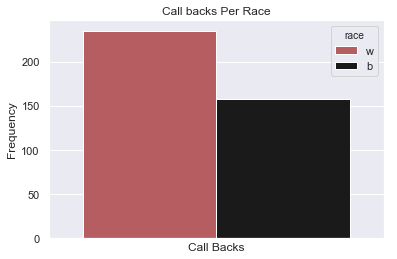

In [10]:
#Visualizing data

#Subsetting the df
call_backs = data[data.call == 1.0]

#Creating a color palette
my_pal = {"w": "r", "b": "k"}

#plotting
sns.countplot(x= "call", hue= "race", data= call_backs, palette= my_pal)
plt.title("Call backs Per Race")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel("Call Backs")
plt.ylabel("Frequency")
plt.show

### Bootstrap Two-Sample Test

In [18]:
#First, find the combined mean
combined_mean = np.mean(data.call)

#Compute the original difference of means:
original_diff_mean = np.mean(w_mu-b_mu)

# Shift each array so they reflect the combined mean
w_shifted = w_ary - w_mu + combined_mean 
b_shifted = b_ary - b_mu + combined_mean

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_w = draw_bs_reps(w_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(b_shifted, np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_w - bs_replicates_b

print (bs_replicates)

# Compute and print p-value: p
p = np.sum(bs_replicates >= original_diff_mean) / len(bs_replicates) 

print(f'P-value = {p:.5f}')
if p < 0.05:    # alpha value is 0.05 or 5%
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")

#create a bootstrap test for the combined data to compute the confidence interval
bs_replicates_all = draw_bs_reps(data.call,np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates_all, [2.5, 97.5])

# Print the confidence interval & margin of error
print(f"The margin of error = {combined_mean - conf_int[:1]}")
print(f'The 95% confidence interval = {conf_int}')

[0.010 -0.008 0.005 ... 0.010 0.003 0.006]
P-value = 0.00000
We reject the null hypothesis
The margin of error = [0.007]
The 95% confidence interval = [0.073 0.088]


### Frequentist Two-Sample Test

In [14]:
#z-test 
ztest ,pval = stests.ztest(w_ary, x2=b_ary, value=0,alternative='two-sided')

#results
print(f"P-value:{pval:.5f}")
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("We reject the null hypothesis")
else:
    print("We accept the null hypothesis")
    
# Compute mean and standard deviation of the current sample: mu, sigma
n= len(data.call)
sd = np.std(data.call)
z= 1.96 #95% confidence interval

#Compute the 95% confidence interval
margin_er = z * (sd/math.sqrt(n))

# Print the confidence interval & margin of error
print(f"The margin of error = {margin_er}")
print(f'The 95% confidence interval = [{combined_mean- margin_er}, {combined_mean + margin_er}]')

P-value:0.00004
We reject the null hypothesis
The margin of error = 0.0076408686955078
The 95% confidence interval = [0.07285194816993638, 0.08813368556095198]


### Conclusions

* *Both the frequentist and the bootstrap test rejected the null hypothesis that black & white sounding names have the same mean callback rates. Thus, the probability that these two are different due to chance is low enough that we can conclude that the callback rates in white versus black names are in fact different.*
* *Just because there is a significant difference between white & black sounding names callback rates, this doesn’t conclude that is why they are different. It could be because there is a difference educational background, or experience.*
* *You would need to build a classification model to investigate the differences between other features to try to decipher where the difference in callback rates originated from*
